In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.decomposition import PCA
from keras.models import Model
from keras.layers import Input, Dense

### Dataset Overview

In [9]:
data = pd.read_csv('../Week 2/NY property data.csv')

In [3]:
data.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,...,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,...,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,...,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070994 entries, 0 to 1070993
Data columns (total 32 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   RECORD    1070994 non-null  int64  
 1   BBLE      1070994 non-null  object 
 2   B         1070994 non-null  int64  
 3   BLOCK     1070994 non-null  int64  
 4   LOT       1070994 non-null  int64  
 5   EASEMENT  4636 non-null     object 
 6   OWNER     1039249 non-null  object 
 7   BLDGCL    1070994 non-null  object 
 8   TAXCLASS  1070994 non-null  object 
 9   LTFRONT   1070994 non-null  int64  
 10  LTDEPTH   1070994 non-null  int64  
 11  EXT       354305 non-null   object 
 12  STORIES   1014730 non-null  float64
 13  FULLVAL   1070994 non-null  float64
 14  AVLAND    1070994 non-null  float64
 15  AVTOT     1070994 non-null  float64
 16  EXLAND    1070994 non-null  float64
 17  EXTOT     1070994 non-null  float64
 18  EXCD1     638488 non-null   float64
 19  STADDR    1070318 non

In [5]:
data.describe()

,RECORD,B,BLOCK,LOT,LTFRONT,LTDEPTH,STORIES,FULLVAL,AVLAND,AVTOT,...,EXTOT,EXCD1,ZIP,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.014730e+06,1.070994e+06,1.070994e+06,1.070994e+06,...,1.070994e+06,638488.000000,1.041104e+06,1.070994e+06,1.070994e+06,2.827260e+05,2.827320e+05,8.744900e+04,1.308280e+05,92948.000000
mean,5.354975e+05,3.215427e+00,4.757239e+03,3.647221e+02,3.663530e+01,8.886159e+01,5.006918e+00,8.742645e+05,8.506792e+04,2.272382e+05,...,9.118698e+04,1602.014232,1.092396e+04,2.304277e+01,3.992284e+01,2.462357e+05,7.139114e+05,3.512357e+05,6.567683e+05,1364.041679
std,3.091695e+05,1.201197e+00,3.676579e+03,8.532152e+02,7.403284e+01,7.639628e+01,8.365707e+00,1.158243e+07,4.057260e+06,6.877529e+06,...,6.508403e+06,1384.226741,5.284208e+02,3.557970e+01,4.270715e+01,6.178963e+06,1.165253e+07,1.080221e+07,1.607251e+07,1094.705653
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1010.000000,1.000100e+04,0.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,1.000000e+00,7.000000e+00,1011.000000
25%,2.677492e+05,3.000000e+00,1.555000e+03,2.300000e+01,1.900000e+01,8.000000e+01,2.000000e+00,3.040000e+05,9.180000e+03,1.837400e+04,...,0.000000e+00,1017.000000,1.031400e+04,1.500000e+01,2.600000e+01,5.705000e+03,3.391200e+04,2.090000e+03,2.870000e+03,1017.000000
50%,5.354975e+05,3.000000e+00,4.047000e+03,4.900000e+01,2.500000e+01,1.000000e+02,2.000000e+00,4.470000e+05,1.367800e+04,2.534000e+04,...,1.620000e+03,1017.000000,1.121400e+04,2.000000e+01,3.900000e+01,2.014500e+04,7.996250e+04,3.048000e+03,3.706200e+04,1017.000000
75%,8.032458e+05,4.000000e+00,6.898000e+03,1.430000e+02,4.000000e+01,1.000000e+02,3.000000e+00,6.190000e+05,1.974000e+04,4.543800e+04,...,2.090000e+03,1017.000000,1.136400e+04,2.400000e+01,5.000000e+01,6.264000e+04,2.405510e+05,3.177900e+04,1.068408e+05,1017.000000
max,1.070994e+06,5.000000e+00,1.635000e+04,9.978000e+03,9.999000e+03,9.999000e+03,1.190000e+02,6.150000e+09,2.668500e+09,4.668309e+09,...,4.668309e+09,7170.000000,3.380300e+04,7.575000e+03,9.393000e+03,2.371005e+09,4.501180e+09,2.371005e+09,4.501180e+09,7160.000000


### Filling Missing Values

##### Filling ZIP

In [10]:
data['ZIP'].isnull().sum()

29890

In [11]:
len(data.loc[data.ZIP == 0])

0

In [12]:
# Filling ZIP
missing_zip = data[data['ZIP'].isnull()]
missing_zip = missing_zip.index
for i in range(len(missing_zip)):
    if data.loc[missing_zip[i]-1, 'ZIP'] == data.loc[missing_zip[i]+1, 'ZIP']:
        data.loc[missing_zip[i], 'ZIP'] = data.loc[missing_zip[i]-1, 'ZIP']
    else: 
        data.loc[missing_zip[i], 'ZIP'] = data.loc[missing_zip[i]-1, 'ZIP']

data['ZIP'].isnull().sum()

0

##### Filling STORIES

In [13]:
missing_sto = data[data['STORIES'].isnull()]
len(missing_sto)

56264

In [14]:
missing_sto.TAXCLASS.value_counts()

1B    24736
4     22354
3      4635
2      3435
1       897
2C      138
2B       34
2A       30
1A        5
Name: TAXCLASS, dtype: int64

In [15]:
stories_mean = data.groupby('TAXCLASS').agg({'STORIES': 'mean'})
stories_mean

,STORIES
TAXCLASS,
1,2.111641
1A,1.656837
1B,4.000000
1C,3.052748
1D,1.068966
2,16.095110
2A,2.844574
2B,4.004494
2C,4.745097


In [16]:
len(data.loc[data['STORIES']==0])

0

In [17]:
for i in stories_mean.index:
    data.loc[(data['STORIES'].isnull())&(data['TAXCLASS']==i), 'STORIES'] = stories_mean.loc[i, 'STORIES']

data.STORIES.isnull().sum()

0

##### Filling FULLVAL

In [18]:
data['FULLVAL'].replace('NaN', 0)
len(data.loc[data['FULLVAL'] == 0])

13007

In [19]:
temp = data.loc[data['FULLVAL'] != 0]
mean_fullval = temp.groupby('TAXCLASS').agg({'FULLVAL':'mean'})
for i in mean_fullval.index:
    data.loc[(data['FULLVAL']==0)&(data['TAXCLASS']==i), 'FULLVAL'] = mean_fullval.loc[i, 'FULLVAL']

len(data.loc[data['FULLVAL'] == 0])

0

##### Filling AVLAND

In [20]:
data['AVLAND'].replace('NaN', 0)
len(data.loc[data['AVLAND'] == 0])

13009

In [21]:
temp = data.loc[data['AVLAND'] != 0]
mean_avland = temp.groupby('TAXCLASS').agg({'AVLAND':'mean'})
for i in mean_avland.index:
    data.loc[(data['AVLAND']==0)&(data['TAXCLASS']==i), 'AVLAND'] = mean_avland.loc[i, 'AVLAND']

len(data.loc[data['AVLAND'] == 0])

0

##### Filling AVTOT

In [22]:
data['AVTOT'].replace('NaN', 0)
len(data.loc[data['AVTOT'] == 0])

13007

In [23]:
temp = data.loc[data['AVTOT'] != 0]
mean_avtot = temp.groupby('TAXCLASS').agg({'AVTOT':'mean'})
for i in mean_avtot.index:
    data.loc[(data['AVTOT']==0)&(data['TAXCLASS']==i), 'AVTOT'] = mean_avtot.loc[i, 'AVTOT']

len(data.loc[data['AVTOT'] == 0])

0

##### Filling LTFRONT, LTDEPTH, BLDFRONT, BLDDEPTH

In [24]:
data.loc[data['LTFRONT'] == 0, 'LTFRONT'] = np.nan
data.loc[data['LTDEPTH'] == 0, 'LTDEPTH'] = np.nan
data.loc[data['BLDFRONT'] == 0, 'BLDFRONT'] = np.nan
data.loc[data['BLDDEPTH'] == 0, 'BLDDEPTH'] = np.nan
data.loc[data['LTFRONT'] == 1, 'LTFRONT'] = np.nan
data.loc[data['LTDEPTH'] == 1, 'LTDEPTH'] = np.nan
data.loc[data['BLDFRONT'] == 1, 'BLDFRONT'] = np.nan
data.loc[data['BLDDEPTH'] == 1, 'BLDDEPTH'] = np.nan

In [25]:
mean_LTF = data.groupby('TAXCLASS').agg({'LTFRONT': 'mean'})
mean_LTD = data.groupby('TAXCLASS').agg({'LTDEPTH': 'mean'})
mean_BLDF = data.groupby('TAXCLASS').agg({'BLDFRONT': 'mean'})
mean_BLDD = data.groupby('TAXCLASS').agg({'BLDDEPTH': 'mean'})

In [26]:
for i in mean_LTF.index:
    data.loc[(data['LTFRONT'].isnull())&(data['TAXCLASS'] == i), 'LTFRONT'] = mean_LTF.loc[i, 'LTFRONT']
    data.loc[(data['LTDEPTH'].isnull())&(data['TAXCLASS'] == i), 'LTDEPTH'] = mean_LTD.loc[i, 'LTDEPTH']
    data.loc[(data['BLDFRONT'].isnull())&(data['TAXCLASS'] == i), 'BLDFRONT'] = mean_BLDF.loc[i, 'BLDFRONT']
    data.loc[(data['BLDDEPTH'].isnull())&(data['TAXCLASS'] == i), 'BLDDEPTH'] = mean_BLDD.loc[i, 'BLDDEPTH']

### Feature Engineering

In [27]:
data['ZIP'] = data.ZIP.astype(str)
data['ZIP3'] = data['ZIP'].str[:3]

In [28]:
data['ltsize'] = data['LTFRONT'] * data['LTDEPTH']
data['bldsize'] = data['BLDFRONT'] * data['BLDDEPTH']
data['bldvol'] = data['bldsize'] * data['STORIES']

In [29]:
data['r1'] = data['FULLVAL']/data['ltsize']
data['r2'] = data['FULLVAL']/data['bldsize']
data['r3'] = data['FULLVAL']/data['bldvol']
data['r4'] = data['AVLAND']/data['ltsize']
data['r5'] = data['AVLAND']/data['bldsize']
data['r6'] = data['AVLAND']/data['bldvol']
data['r7'] = data['AVTOT']/data['ltsize']
data['r8'] = data['AVTOT']/data['bldsize']
data['r9'] = data['AVTOT']/data['bldvol']

In [30]:
ninevars = ['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9']
zip5_mean = data.groupby('ZIP')[ninevars].mean()
zip3_mean = data.groupby('ZIP3')[ninevars].mean()
taxclass_mean = data.groupby('TAXCLASS')[ninevars].mean()
borough_mean = data.groupby('B')[ninevars].mean()
data = data.join(zip5_mean, on = 'ZIP', rsuffix = '_ZIP5')
data = data.join(zip3_mean, on = 'ZIP3', rsuffix = '_ZIP3')
data = data.join(taxclass_mean, on = 'TAXCLASS', rsuffix = '_TAXCLASS')
data = data.join(borough_mean, on = 'B', rsuffix = '_BORO')


In [31]:

rsuffix = ['_ZIP5', '_ZIP3', '_TAXCLASS', '_BORO']
for var in ninevars:
    for r in rsuffix:
        data[str(var)+r] = data[var]/data[str(var)+r]

In [32]:
zip5_mean

,r1,r2,r3,r4,r5,r6,r7,r8,r9
ZIP,,,,,,,,,
10001.0,549.363984,718.715718,139.168312,82.863687,111.651260,27.943118,209.409206,269.742561,48.862604
10002.0,350.833439,533.919942,174.232108,42.887994,89.388921,42.184592,111.591043,179.792640,61.024550
10003.0,586.263725,846.478105,230.800773,44.310823,82.724547,37.126975,131.141632,194.850185,55.669106
10004.0,407.688707,617.730001,153.819187,56.054163,127.029325,55.446690,170.572406,264.536456,66.183915
10005.0,126.448358,169.887110,29.341565,19.723404,31.461622,10.270253,55.427930,74.829566,12.878438
...,...,...,...,...,...,...,...,...,...
11694.0,142.138981,658.833733,325.186456,6.839483,29.919105,12.710516,11.889165,46.701281,21.365730
11695.0,161.918025,15744.588289,4918.426855,69.399465,6191.433896,1932.912501,71.764077,6776.996396,2136.275001
11696.0,30.178792,44.432475,8.157286,13.580456,19.994614,3.670779,13.580456,19.994614,3.670779


In [30]:
data.to_csv('Cleaned_data.csv')

In [33]:
result = data.iloc[:, 36:]

In [34]:
result.columns

Index(['r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r1_ZIP5',
       'r2_ZIP5', 'r3_ZIP5', 'r4_ZIP5', 'r5_ZIP5', 'r6_ZIP5', 'r7_ZIP5',
       'r8_ZIP5', 'r9_ZIP5', 'r1_ZIP3', 'r2_ZIP3', 'r3_ZIP3', 'r4_ZIP3',
       'r5_ZIP3', 'r6_ZIP3', 'r7_ZIP3', 'r8_ZIP3', 'r9_ZIP3', 'r1_TAXCLASS',
       'r2_TAXCLASS', 'r3_TAXCLASS', 'r4_TAXCLASS', 'r5_TAXCLASS',
       'r6_TAXCLASS', 'r7_TAXCLASS', 'r8_TAXCLASS', 'r9_TAXCLASS', 'r1_BORO',
       'r2_BORO', 'r3_BORO', 'r4_BORO', 'r5_BORO', 'r6_BORO', 'r7_BORO',
       'r8_BORO', 'r9_BORO'],
      dtype='object')

In [37]:
for_later = ['RECORD','r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r1_ZIP5',
       'r2_ZIP5', 'r3_ZIP5', 'r4_ZIP5', 'r5_ZIP5', 'r6_ZIP5', 'r7_ZIP5',
       'r8_ZIP5', 'r9_ZIP5', 'r1_ZIP3', 'r2_ZIP3', 'r3_ZIP3', 'r4_ZIP3',
       'r5_ZIP3', 'r6_ZIP3', 'r7_ZIP3', 'r8_ZIP3', 'r9_ZIP3', 'r1_TAXCLASS',
       'r2_TAXCLASS', 'r3_TAXCLASS', 'r4_TAXCLASS', 'r5_TAXCLASS',
       'r6_TAXCLASS', 'r7_TAXCLASS', 'r8_TAXCLASS', 'r9_TAXCLASS', 'r1_BORO',
       'r2_BORO', 'r3_BORO', 'r4_BORO', 'r5_BORO', 'r6_BORO', 'r7_BORO',
       'r8_BORO', 'r9_BORO']

In [38]:
for_later = data[for_later]
for_later.head()

,RECORD,r1,r2,r3,r4,r5,r6,r7,r8,r9,...,r9_TAXCLASS,r1_BORO,r2_BORO,r3_BORO,r4_BORO,r5_BORO,r6_BORO,r7_BORO,r8_BORO,r9_BORO
0,1,40.917782,3781.487225,694.237107,8.079350,746.667022,137.079388,18.413002,1701.669251,312.406698,...,2.794864,0.115040,6.906445,5.079761,0.238229,11.898251,6.281489,0.199588,11.907976,9.364705
1,2,53616.895011,34245.431036,6287.063144,3959.018409,2528.648700,464.230514,24127.602755,15410.443966,2829.178415,...,25.310494,150.743329,62.545284,46.002691,116.736206,40.294395,21.272775,261.531359,107.839517,84.807469
2,3,261.796157,261.796157,87.265386,97.551991,97.551991,32.517330,117.808271,117.808271,39.269424,...,0.351313,0.736037,0.478140,0.638524,2.876433,1.554506,1.490065,1.276984,0.824401,1.177140
3,4,89.714219,836.980890,418.490445,34.913021,325.717946,162.858973,40.371399,376.641401,188.320700,...,1.684761,0.252231,1.528648,3.062111,1.029451,5.190364,7.462806,0.437606,2.635669,5.645102
4,5,669.074647,53676.325646,53676.325646,297.434763,23861.620343,23861.620343,301.083591,24154.346541,24154.346541,...,216.090453,1.881096,98.033545,392.751808,8.770206,380.238484,1093.428521,3.263598,169.027775,724.050838


In [36]:
result.describe().T.round(4)

,count,mean,std,min,25%,50%,75%,max
r1,1070994.0,211.5870,667.2988,0.0003,70.9246,150.3846,241.0000,3.423792e+05
r2,1070994.0,542.5089,2328.0982,0.0007,170.5387,493.3333,680.3419,1.097094e+06
r3,1070994.0,249.0844,1491.1437,0.0001,68.8009,234.8958,333.0645,1.097094e+06
r4,1070994.0,11.0347,178.7615,0.0000,2.2305,4.5561,7.2221,1.540706e+05
r5,1070994.0,28.6730,979.3136,0.0002,5.6066,14.8788,20.2930,4.914844e+05
r6,1070994.0,13.9763,643.9950,0.0000,1.7364,7.0831,10.0332,4.914844e+05
r7,1070994.0,27.2113,268.8211,0.0000,5.1284,8.4856,13.4925,1.540706e+05
r8,1070994.0,56.4669,1285.7341,0.0003,16.7173,26.8147,36.0159,8.249136e+05
r9,1070994.0,23.0625,705.0177,0.0001,6.5704,12.5889,17.5676,4.936922e+05
r1_ZIP5,1070994.0,1.0000,2.8453,0.0000,0.4225,0.9043,1.2243,1.448251e+03


In [43]:
final = result.describe().T.round(4)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070994 entries, 0 to 1070993
Data columns (total 81 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   RECORD       1070994 non-null  int64  
 1   BBLE         1070994 non-null  object 
 2   B            1070994 non-null  int64  
 3   BLOCK        1070994 non-null  int64  
 4   LOT          1070994 non-null  int64  
 5   EASEMENT     4636 non-null     object 
 6   OWNER        1039249 non-null  object 
 7   BLDGCL       1070994 non-null  object 
 8   TAXCLASS     1070994 non-null  object 
 9   LTFRONT      1070994 non-null  float64
 10  LTDEPTH      1070994 non-null  float64
 11  EXT          354305 non-null   object 
 12  STORIES      1070994 non-null  float64
 13  FULLVAL      1070994 non-null  float64
 14  AVLAND       1070994 non-null  float64
 15  AVTOT        1070994 non-null  float64
 16  EXLAND       1070994 non-null  float64
 17  EXTOT        1070994 non-null  float64
 18  EX

In [45]:
final.to_csv('Assignment2.csv')

### Feature Selection via PCA

In [55]:
data.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,r9_TAXCLASS,r1_BORO,r2_BORO,r3_BORO,r4_BORO,r5_BORO,r6_BORO,r7_BORO,r8_BORO,r9_BORO
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500.0,...,2.624110,0.114401,6.878229,4.993136,0.234725,11.759224,6.071127,0.197696,11.818277,9.069199
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27.0,...,23.764139,150.013517,62.289753,45.218210,115.101891,39.823571,20.560366,259.238195,107.027200,82.131345
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709.0,...,0.329614,0.731948,0.475847,0.627187,2.834128,1.535244,1.439136,1.264879,0.817607,1.139181
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793.0,...,1.580700,0.250829,1.521315,3.007743,1.014310,5.126053,7.207730,0.433458,2.613947,5.463065
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323.0,...,202.743398,1.870646,97.563288,385.778484,8.641219,375.527127,1056.055550,3.232662,167.634723,700.702336


In [39]:
result.head()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_ZIP5,...,r9_TAXCLASS,r1_BORO,r2_BORO,r3_BORO,r4_BORO,r5_BORO,r6_BORO,r7_BORO,r8_BORO,r9_BORO
0,40.917782,3781.487225,694.237107,8.079350,746.667022,137.079388,18.413002,1701.669251,312.406698,0.100365,...,2.794864,0.115040,6.906445,5.079761,0.238229,11.898251,6.281489,0.199588,11.907976,9.364705
1,53616.895011,34245.431036,6287.063144,3959.018409,2528.648700,464.230514,24127.602755,15410.443966,2829.178415,131.514300,...,25.310494,150.743329,62.545284,46.002691,116.736206,40.294395,21.272775,261.531359,107.839517,84.807469
2,261.796157,261.796157,87.265386,97.551991,97.551991,32.517330,117.808271,117.808271,39.269424,0.642147,...,0.351313,0.736037,0.478140,0.638524,2.876433,1.554506,1.490065,1.276984,0.824401,1.177140
3,89.714219,836.980890,418.490445,34.913021,325.717946,162.858973,40.371399,376.641401,188.320700,0.220056,...,1.684761,0.252231,1.528648,3.062111,1.029451,5.190364,7.462806,0.437606,2.635669,5.645102
4,669.074647,53676.325646,53676.325646,297.434763,23861.620343,23861.620343,301.083591,24154.346541,24154.346541,1.641141,...,216.090453,1.881096,98.033545,392.751808,8.770206,380.238484,1093.428521,3.263598,169.027775,724.050838


In [40]:
result = (result - result.mean())/result.std()

In [41]:
result.head()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_ZIP5,...,r9_TAXCLASS,r1_BORO,r2_BORO,r3_BORO,r4_BORO,r5_BORO,r6_BORO,r7_BORO,r8_BORO,r9_BORO
0,-0.255761,1.391255,0.298531,-0.016532,0.733160,0.191155,-0.032729,1.279582,0.410407,-0.316187,...,0.239674,-0.291407,1.378940,0.423640,-0.035493,0.353823,0.146368,-0.069324,0.464675,0.328655
1,80.032072,14.476590,4.049227,22.085202,2.552784,0.699158,89.652154,11.941798,3.980206,45.870785,...,3.246255,49.308730,14.368584,4.673052,5.392397,1.275732,0.561827,22.564714,4.551318,3.292858
2,0.075242,-0.120576,-0.108520,0.483982,0.070334,0.028791,0.337016,0.047709,0.022988,-0.125772,...,-0.086621,-0.086920,-0.121835,-0.037535,0.087427,0.018003,0.013581,0.023990,-0.007480,0.006960
3,-0.182636,0.126486,0.113608,0.133577,0.303320,0.231186,0.048955,0.249021,0.234403,-0.274121,...,0.091438,-0.246232,0.123420,0.214128,0.001372,0.136044,0.179106,-0.048709,0.069679,0.182510
4,0.685581,22.822842,35.829707,1.602135,24.336380,37.030788,1.018790,18.742506,34.227910,0.225337,...,28.721692,0.290135,22.653802,40.679265,0.362030,12.312361,30.274899,0.196051,7.157913,28.409205


In [42]:
pca = PCA(n_components = 0.99, svd_solver = 'full')
pca.fit(result)

PCA(n_components=0.99, svd_solver='full')

(0, 1)

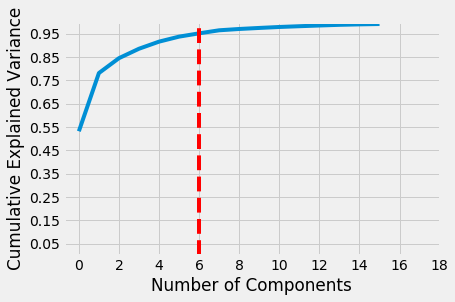

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.yticks(np.arange(0.05, 1.1, step = 0.1))
plt.xticks(np.arange(0, 20, step = 2))
plt.axvline(x = 6, linestyle = '--', color = 'red')
plt.ylim(0,1)

In [44]:
pca = PCA(n_components = 6)
princ_comps = pca.fit_transform(result)
data_pca = pd.DataFrame(princ_comps, columns = ['PC' + str(i) for i in range(1, pca.n_components +1)])
data_pca.shape

(1070994, 6)

In [45]:
data_pca = (data_pca - data_pca.mean())/data_pca.std()

In [46]:
data_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,-1.338400e-16,-2.171914e-16,-1.080220e-15,5.752322e-16,2.019545e-15,-8.305426e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.473123e-01,-3.121770e+02,-4.693497e+02,-1.839580e+02,-3.911584e+02,-2.618060e+02
25%,-6.862403e-02,-9.947863e-02,-6.131602e-02,-1.448078e-01,-1.114988e-01,-7.018174e-02
50%,-1.944495e-02,-4.105365e-02,1.099319e-02,-2.396815e-02,-5.630886e-02,7.525584e-04
75%,1.192503e-02,2.033200e-02,1.500593e-01,5.505629e-02,3.222942e-02,1.235233e-01
max,5.229280e+02,6.036698e+02,6.141779e+02,3.898520e+02,4.478940e+02,4.230685e+02


### Anormalies Detect Algorithm

In [47]:
p = 2
one_over_p = 1/p
score1 = (((data_pca).abs()**p).sum(axis = 1))**one_over_p

In [48]:
# placeholder for input
data_in = Input(shape=(6,))
# dimension of the encoded data. Choose 3
encoded_dim = 3
# encoded representation of the data
encoded = Dense(encoded_dim, activation='tanh')(data_in)
# reconstruction of the input
decoded = Dense(6,activation='tanh')(encoded)
# this model maps the input data to the reconstructed data
autoencoder = Model(data_in, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [49]:
autoencoder.fit(data_pca,data_pca, epochs=5, shuffle=True, validation_data=(data_pca,data_pca))

pca_out = autoencoder.predict(data_pca)
error = pca_out - data_pca
p=2
oop=1/p
score2 = ((error.abs()**p).sum(axis=1))**oop

Epoch 1/5
33469/33469 [==============================] - 33s 964us/step - loss: 1.0149 - val_loss: 0.9303
Epoch 2/5
33469/33469 [==============================] - 42s 1ms/step - loss: 1.1983 - val_loss: 0.9274
Epoch 3/5
33469/33469 [==============================] - 45s 1ms/step - loss: 0.8004 - val_loss: 0.9266
Epoch 4/5
33469/33469 [==============================] - 46s 1ms/step - loss: 0.8157 - val_loss: 0.9262
Epoch 5/5
33469/33469 [==============================] - 48s 1ms/step - loss: 0.7437 - val_loss: 0.9260


In [50]:
print(len(score1), len(score2))

1070994 1070994


In [54]:
score2.max()

918.4807594895915

In [55]:
original = pd.read_csv('../Week 2/NY property data.csv')

In [56]:
original['Score1'] = score1
original['Score2'] = score2
original['Score1_rank'] = original['Score1'].rank()
original['Score2_rank'] = original['Score2'].rank()
original['Final_Score'] = (original['Score1_rank'] + original['Score2_rank'])/2

(0.1, 2141173.0413904563)

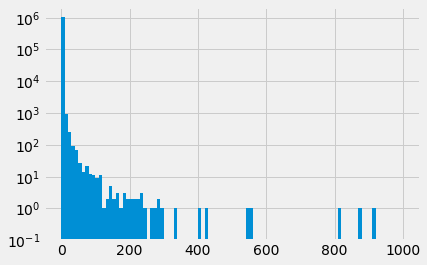

In [57]:
plt.hist(score1, bins = 100, range = (0,1000))
plt.yscale('log')
plt.ylim(ymin = 0.1)

(0.1, 2141950.817119707)

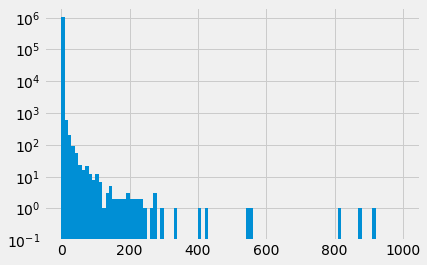

In [58]:
plt.hist(score2, bins = 100, range = (0,1000))
plt.yscale('log')
plt.ylim(ymin = 0.1)

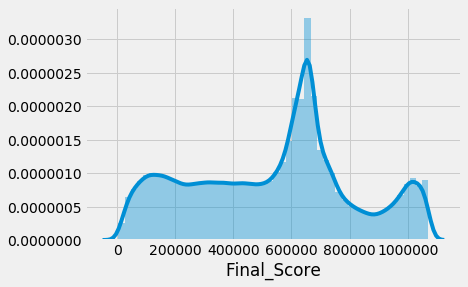

In [59]:
sns.distplot(original['Final_Score'])

In [60]:
output = original.sort_values(by = 'Final_Score', ascending = False).head(100)

In [59]:
output.to_csv('../Week 4/Scores.csv', index=False)

### Make Some Adjustments

In [5]:
data2 = pd.read_csv('Cleaned_data.csv', low_memory= False)
data2 = data2.iloc[:, 37:]

In [10]:
data2

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_ZIP5,...,r9_TAXCLASS,r1_BORO,r2_BORO,r3_BORO,r4_BORO,r5_BORO,r6_BORO,r7_BORO,r8_BORO,r9_BORO
0,40.917782,3781.487225,694.237107,8.079350,746.667022,137.079388,18.413002,1701.669251,312.406698,0.100365,...,2.794864,0.115040,6.906445,5.079761,0.238229,11.898251,6.281489,0.199588,11.907976,9.364705
1,53616.895011,34245.431036,6287.063144,3959.018409,2528.648700,464.230514,24127.602755,15410.443966,2829.178415,131.514300,...,25.310494,150.743329,62.545284,46.002691,116.736206,40.294395,21.272775,261.531359,107.839517,84.807469
2,261.796157,261.796157,87.265386,97.551991,97.551991,32.517330,117.808271,117.808271,39.269424,0.642147,...,0.351313,0.736037,0.478140,0.638524,2.876433,1.554506,1.490065,1.276984,0.824401,1.177140
3,89.714219,836.980890,418.490445,34.913021,325.717946,162.858973,40.371399,376.641401,188.320700,0.220056,...,1.684761,0.252231,1.528648,3.062111,1.029451,5.190364,7.462806,0.437606,2.635669,5.645102
4,669.074647,53676.325646,53676.325646,297.434763,23861.620343,23861.620343,301.083591,24154.346541,24154.346541,1.641141,...,216.090453,1.881096,98.033545,392.751808,8.770206,380.238484,1093.428521,3.263598,169.027775,724.050838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070989,60.833333,561.538462,224.615385,2.018889,18.635897,7.454359,3.239167,29.900000,11.960000,0.421815,...,0.824280,0.394276,1.200111,0.878423,0.189742,0.845776,0.586497,0.139061,0.850568,0.599572
1070990,38.483305,653.846154,261.538462,0.658107,11.181490,4.472596,1.056098,17.943510,7.177404,0.266841,...,0.494665,0.249420,1.397389,1.022821,0.061851,0.507464,0.351897,0.045340,0.510441,0.359814
1070991,33.174373,625.000000,312.500000,1.022185,19.257812,9.628906,1.587878,29.915365,14.957682,0.230029,...,1.030880,0.215011,1.335740,1.222121,0.096068,0.874001,0.757587,0.068170,0.851005,0.749850
1070992,76.781674,808.035714,404.017857,1.751697,18.434524,9.217262,3.257494,34.281250,17.140625,0.532400,...,1.181328,0.497641,1.726921,1.580028,0.164630,0.836637,0.725199,0.139848,0.975202,0.859284


In [11]:
data2 = (data2 - data2.mean())/data2.std()

In [12]:
data2.head()

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_ZIP5,...,r9_TAXCLASS,r1_BORO,r2_BORO,r3_BORO,r4_BORO,r5_BORO,r6_BORO,r7_BORO,r8_BORO,r9_BORO
0,-0.255761,1.391255,0.298531,-0.016532,0.733160,0.191155,-0.032729,1.279582,0.410407,-0.316187,...,0.239674,-0.291407,1.378940,0.423640,-0.035493,0.353823,0.146368,-0.069324,0.464675,0.328655
1,80.032072,14.476590,4.049227,22.085202,2.552784,0.699158,89.652154,11.941798,3.980206,45.870785,...,3.246255,49.308730,14.368584,4.673052,5.392397,1.275732,0.561827,22.564714,4.551318,3.292858
2,0.075242,-0.120576,-0.108520,0.483982,0.070334,0.028791,0.337016,0.047709,0.022988,-0.125772,...,-0.086621,-0.086920,-0.121835,-0.037535,0.087427,0.018003,0.013581,0.023990,-0.007480,0.006960
3,-0.182636,0.126486,0.113608,0.133577,0.303320,0.231186,0.048955,0.249021,0.234403,-0.274121,...,0.091438,-0.246232,0.123420,0.214128,0.001372,0.136044,0.179106,-0.048709,0.069679,0.182510
4,0.685581,22.822842,35.829707,1.602135,24.336380,37.030788,1.018790,18.742506,34.227910,0.225337,...,28.721692,0.290135,22.653802,40.679265,0.362030,12.312361,30.274899,0.196051,7.157913,28.409205


In [13]:
pca = PCA(n_components = 0.99, svd_solver = 'full')
pca.fit(data2)

PCA(n_components=0.99, svd_solver='full')

In [14]:
pca.explained_variance_ratio_

array([0.53169854, 0.24951757, 0.06380408, 0.04045911, 0.03039407,
       0.02149323, 0.01412145, 0.01303193, 0.00563735, 0.00446267,
       0.00411951, 0.00327443, 0.0030883 , 0.00287891, 0.0019999 ,
       0.00146777])

(0, 1)

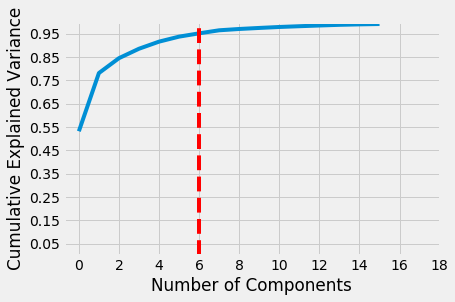

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.yticks(np.arange(0.05, 1.1, step = 0.1))
plt.xticks(np.arange(0, 20, step = 2))
plt.axvline(x = 6, linestyle = '--', color = 'red')
plt.ylim(0,1)

In [16]:
pca = PCA(n_components = 8)
princ_comps = pca.fit_transform(data2)
data_pca = pd.DataFrame(princ_comps, columns = ['PC' + str(i) for i in range(1, pca.n_components +1)])
data_pca.shape

(1070994, 8)

In [19]:
data_pca = (data_pca - data_pca.mean())/data_pca.std()

In [20]:
data_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
count,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
mean,-1.154628e-16,-1.767048e-15,4.425124e-16,-5.871582e-16,-2.561318e-15,1.281029e-16,-1.820750e-15,4.051529e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.473123e-01,-3.121770e+02,-4.693497e+02,-1.839580e+02,-3.911585e+02,-2.618058e+02,-2.129460e+02,-2.260996e+02
25%,-6.862403e-02,-9.947863e-02,-6.131603e-02,-1.448078e-01,-1.114987e-01,-7.018104e-02,-1.120000e-01,-5.556455e-02
50%,-1.944495e-02,-4.105365e-02,1.099319e-02,-2.396819e-02,-5.630886e-02,7.527785e-04,4.434747e-03,1.525703e-02
75%,1.192503e-02,2.033200e-02,1.500593e-01,5.505631e-02,3.222937e-02,1.235225e-01,8.384108e-02,1.295473e-01
max,5.229280e+02,6.036698e+02,6.141779e+02,3.898520e+02,4.478940e+02,4.230685e+02,3.327263e+02,3.030400e+02


In [22]:
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.542193,-0.361890,0.178177,1.103545,-1.023708,-0.629848,1.093355,0.100281
1,14.030730,36.410934,-29.325441,24.314729,44.335863,-14.134704,41.507260,-26.195099
2,-0.017539,0.090764,0.091846,-0.128795,-0.023054,0.055192,-0.144919,0.416162
3,0.135280,-0.184662,0.052796,-0.101049,-0.224712,0.039881,0.031392,0.341237
4,26.227799,-15.458395,-25.729132,-12.964784,-2.185009,6.225272,4.992498,8.610242


In [23]:
# this time set p = 1 ==> Manhattan Distance
p = 1
one_over_p = 1/p
score1 = (((data_pca).abs()**p).sum(axis = 1))**one_over_p

In [28]:
# placeholder for input
data_in = Input(shape=(8,))
# dimension of the encoded data. Choose 3
encoded_dim = 3
# encoded representation of the data
encoded = Dense(encoded_dim, activation='tanh')(data_in)
# reconstruction of the input
decoded = Dense(8,activation='tanh')(encoded)
# this model maps the input data to the reconstructed data
autoencoder = Model(data_in, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
autoencoder.fit(data_pca,data_pca, epochs=5, shuffle=True, validation_data=(data_pca,data_pca))

pca_out = autoencoder.predict(data_pca)
error = pca_out - data_pca
p=4
oop=1/p
score2 = ((error.abs()**p).sum(axis=1))**oop

Epoch 1/5
33469/33469 [==============================] - 30s 890us/step - loss: 0.9520 - val_loss: 0.9290
Epoch 2/5
33469/33469 [==============================] - 37s 1ms/step - loss: 0.6736 - val_loss: 0.9268
Epoch 3/5
33469/33469 [==============================] - 45s 1ms/step - loss: 0.7240 - val_loss: 0.9268
Epoch 4/5
33469/33469 [==============================] - 45s 1ms/step - loss: 0.7417 - val_loss: 0.9258
Epoch 5/5
33469/33469 [==============================] - 44s 1ms/step - loss: 0.7242 - val_loss: 0.9257


In [30]:
print(len(score1), score1.max(), len(score2), score2.max())

1070994 2328.352993396009 1070994 694.553675933564


In [31]:
original = pd.read_csv('../Week 2/NY property data.csv')

In [32]:
original['Score1'] = score1
original['Score2'] = score2
original['Score1_rank'] = original['Score1'].rank()
original['Score2_rank'] = original['Score2'].rank()
original['Final_Score'] = (original['Score1_rank'] + original['Score2_rank'])/2

(0.1, 2120600.5181651576)

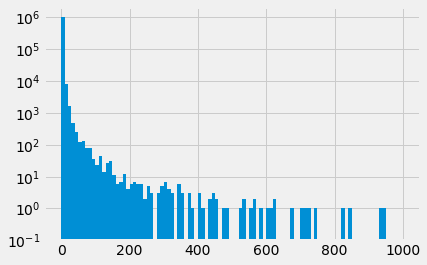

In [33]:
plt.hist(score1, bins = 100, range = (0,1000))
plt.yscale('log')
plt.ylim(ymin = 0.1)

(0.1, 2142089.556906621)

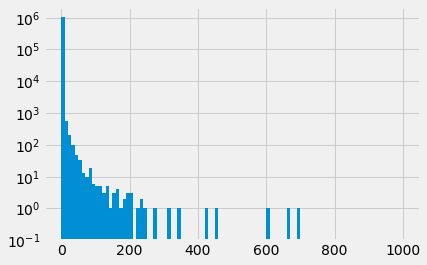

In [34]:
plt.hist(score2, bins = 100, range = (0,1000))
plt.yscale('log')
plt.ylim(ymin = 0.1)

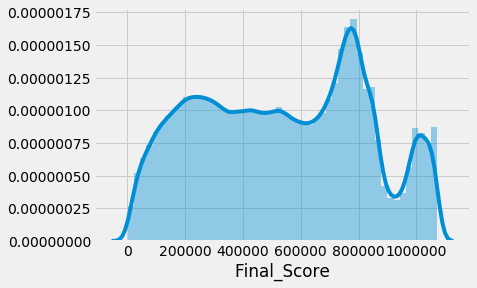

In [35]:
sns.distplot(original['Final_Score'])

In [36]:
output = original.sort_values(by = 'Final_Score', ascending = False).head(100)
output.to_csv('../Week 4/Scores_adjusted.csv', index=False)

In [37]:
output

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,Score1,Score2,Score1_rank,Score2_rank,Final_Score
917941,917942,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910,...,4.501180e+09,NaN,FINAL,2010/11,AC-TR,2320.444232,694.553676,1070993.0,1070994.0,1070993.5
565391,565392,3085900700,3,8590,700,NaN,U S GOVERNMENT OWNRD,V9,4,117,...,8.484847e+08,NaN,FINAL,2010/11,AC-TR,2328.352993,664.963738,1070994.0,1070993.0,1070993.5
85885,85886,1012540010,1,1254,10,NaN,PARKS AND RECREATION,Q1,4,4000,...,2.826018e+07,NaN,FINAL,2010/11,AC-TR,2140.663520,608.500858,1070992.0,1070992.0,1070992.0
684703,684704,4036590105,4,3659,105,NaN,W RUFERT,V0,1B,2,...,NaN,NaN,FINAL,2010/11,AC-TR,1521.964861,457.533166,1070991.0,1070991.0,1070991.0
67128,67129,1011110001,1,1111,1,NaN,CULTURAL AFFAIRS,Q1,4,840,...,2.465055e+09,NaN,FINAL,2010/11,AC-TR,1468.270553,428.605614,1070990.0,1070990.0,1070990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79816,79817,1011870001,1,1187,1,NaN,PARKS AND RECREATION,Q1,4,1631,...,1.671264e+07,NaN,FINAL,2010/11,AC-TR,218.355515,60.169528,1070897.0,1070900.0,1070898.5
56133,56134,1009950005,1,995,5,NaN,UDC,O3,4,200,...,3.542400e+08,NaN,FINAL,2010/11,AC-TR,206.862405,65.127663,1070889.0,1070905.0,1070897.0
6093,6094,1000360018,1,36,18,NaN,DEPT OF TRANSPORTATIO,T2,4,328,...,5.651370e+06,NaN,FINAL,2010/11,AC-TR,225.559024,58.580367,1070898.0,1070895.0,1070896.5
33563,33564,1006890017,1,689,17,NaN,"HLP PROPERTIES, LLC",G6,4,380,...,NaN,NaN,FINAL,2010/11,AC-TR,232.780612,55.542908,1070905.0,1070886.0,1070895.5


In [39]:
scores_adjusted = list(output.RECORD)

In [41]:
unajusted = pd.read_csv('Scores.csv')
unajusted.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,Score1,Score2,Score1_rank,Score2_rank,Final_Score
0,917942,4142600001,4,14260,1,NaN,"LOGAN PROPERTY, INC.",T1,4,4910,...,4.501180e+09,NaN,FINAL,2010/11,AC-TR,918.967296,918.512993,1070994.0,1070994.0,1070994.0
1,565392,3085900700,3,8590,700,NaN,U S GOVERNMENT OWNRD,V9,4,117,...,8.484847e+08,NaN,FINAL,2010/11,AC-TR,871.086632,870.576250,1070993.0,1070993.0,1070993.0
2,85886,1012540010,1,1254,10,NaN,PARKS AND RECREATION,Q1,4,4000,...,2.826018e+07,NaN,FINAL,2010/11,AC-TR,812.139600,811.654589,1070992.0,1070992.0,1070992.0
3,67129,1011110001,1,1111,1,NaN,CULTURAL AFFAIRS,Q1,4,840,...,2.465055e+09,NaN,FINAL,2010/11,AC-TR,553.565031,551.671129,1070991.0,1070991.0,1070991.0
4,684704,4036590105,4,3659,105,NaN,W RUFERT,V0,1B,2,...,NaN,NaN,FINAL,2010/11,AC-TR,545.849425,543.973601,1070990.0,1070990.0,1070990.0


In [42]:
count = 0
for i in unajusted.RECORD:
    if i in scores_adjusted:
        count += 1
print(f'{100-count}% of records are different')

7% of records are different


### HeatMap

In [76]:
result['RECORD'] = data.RECORD

In [77]:
result

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_ZIP5,...,r1_BORO,r2_BORO,r3_BORO,r4_BORO,r5_BORO,r6_BORO,r7_BORO,r8_BORO,r9_BORO,RECORD
0,-0.255761,1.391255,0.298531,-0.016532,0.733160,0.191155,-0.032729,1.279582,0.410407,-0.316187,...,-0.291407,1.378940,0.423640,-0.035493,0.353823,0.146368,-0.069324,0.464675,0.328655,1
1,80.032072,14.476590,4.049227,22.085202,2.552784,0.699158,89.652154,11.941798,3.980206,45.870785,...,49.308730,14.368584,4.673052,5.392397,1.275732,0.561827,22.564714,4.551318,3.292858,2
2,0.075242,-0.120576,-0.108520,0.483982,0.070334,0.028791,0.337016,0.047709,0.022988,-0.125772,...,-0.086920,-0.121835,-0.037535,0.087427,0.018003,0.013581,0.023990,-0.007480,0.006960,3
3,-0.182636,0.126486,0.113608,0.133577,0.303320,0.231186,0.048955,0.249021,0.234403,-0.274121,...,-0.246232,0.123420,0.214128,0.001372,0.136044,0.179106,-0.048709,0.069679,0.182510,4
4,0.685581,22.822842,35.829707,1.602135,24.336380,37.030788,1.018790,18.742506,34.227910,0.225337,...,0.290135,22.653802,40.679265,0.362030,12.312361,30.274899,0.196051,7.157913,28.409205,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070989,-0.225916,0.008174,-0.016410,-0.050435,-0.010249,-0.010127,-0.089175,-0.020663,-0.015748,-0.203210,...,-0.199458,0.046719,-0.012624,-0.037752,-0.005007,-0.011460,-0.074566,-0.006366,-0.015733,1070990
1070990,-0.259410,0.047823,0.008352,-0.058047,-0.017861,-0.014757,-0.097296,-0.029962,-0.022531,-0.257677,...,-0.247157,0.092776,0.002370,-0.043710,-0.015991,-0.017961,-0.082683,-0.020855,-0.025153,1070991
1070991,-0.267365,0.035433,0.042528,-0.056010,-0.009614,-0.006751,-0.095318,-0.020651,-0.011496,-0.270615,...,-0.258488,0.078383,0.023065,-0.042116,-0.004091,-0.006718,-0.080706,-0.006347,-0.009829,1070992
1070992,-0.202017,0.114053,0.103902,-0.051929,-0.010455,-0.007390,-0.089107,-0.017255,-0.008400,-0.164344,...,-0.165421,0.169710,0.060230,-0.038922,-0.005304,-0.007616,-0.074498,-0.001056,-0.005529,1070993


In [78]:
result['Final_Score'] = original.Final_Score

In [81]:
plot_data = result.set_index('RECORD').sort_values(by = 'Final_Score', ascending = False).head(10)

In [82]:
plot_data = plot_data.drop(columns = 'Final_Score')

In [83]:
plot_data

,r1,r2,r3,r4,r5,r6,r7,r8,r9,r1_ZIP5,...,r9_TAXCLASS,r1_BORO,r2_BORO,r3_BORO,r4_BORO,r5_BORO,r6_BORO,r7_BORO,r8_BORO,r9_BORO
RECORD,,,,,,,,,,,,,,,,,,,,,
917942,0.535636,28.155462,14.607118,15.196011,323.460897,163.953849,26.318384,641.545643,389.987533,1.492310,...,328.352098,0.783165,26.629905,7.710688,19.701153,379.852884,194.948448,45.398373,752.629322,444.211540
565392,512.765210,328.137810,93.955048,861.816504,351.253292,98.049397,573.033245,267.519796,89.549858,508.653468,...,75.315338,461.863588,304.868676,54.703561,938.887683,553.119217,175.573719,726.151150,354.612509,134.353747
85886,-0.141711,471.007306,735.572763,0.231539,501.836908,763.158673,0.094670,383.932975,700.222268,-0.165887,...,589.640208,-0.220949,467.560770,833.464564,0.025431,254.237338,624.123556,-0.037172,147.129115,581.421285
67129,81.640121,466.558209,133.630975,132.685538,481.468505,134.402892,91.448412,380.307754,127.312210,33.568954,...,107.119815,50.302149,463.144208,151.484805,32.554357,243.917715,109.908658,23.018041,145.739630,105.702266
684704,209.994955,-0.159183,-0.138220,20.610045,-0.024656,-0.019945,13.647789,-0.040397,-0.031106,224.806257,...,-0.000002,274.043849,-0.163587,-0.088594,26.708414,-0.027038,-0.025624,23.584205,-0.038468,-0.037462
690833,0.796250,259.635741,135.075906,1.715713,264.186396,133.907901,1.142412,211.702818,128.687452,0.840457,...,108.278081,1.123162,245.674325,71.430493,2.253910,310.244852,159.222125,2.054480,248.365155,146.578842
915469,0.493989,70.819634,27.566296,0.119930,10.105426,3.831221,0.019575,7.675449,3.486722,1.217900,...,292.582394,0.728833,67.002021,14.565213,0.188524,11.869057,4.553629,0.121363,9.013270,3.969505
44248,0.549015,192.655103,300.986032,1.323284,196.409332,298.699543,0.866240,157.125534,286.595712,0.231394,...,241.272701,0.205767,191.244109,341.092445,0.293548,99.492882,244.275273,0.157551,60.197738,237.964198
565398,7.048056,175.165427,50.108035,12.310264,187.607419,52.362728,8.125941,142.874565,47.817592,6.955144,...,40.167291,6.305346,162.736074,29.171395,13.431515,295.432109,93.769349,10.338305,189.395531,71.746411


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5]),
 <a list of 45 Text xticklabel objects>)

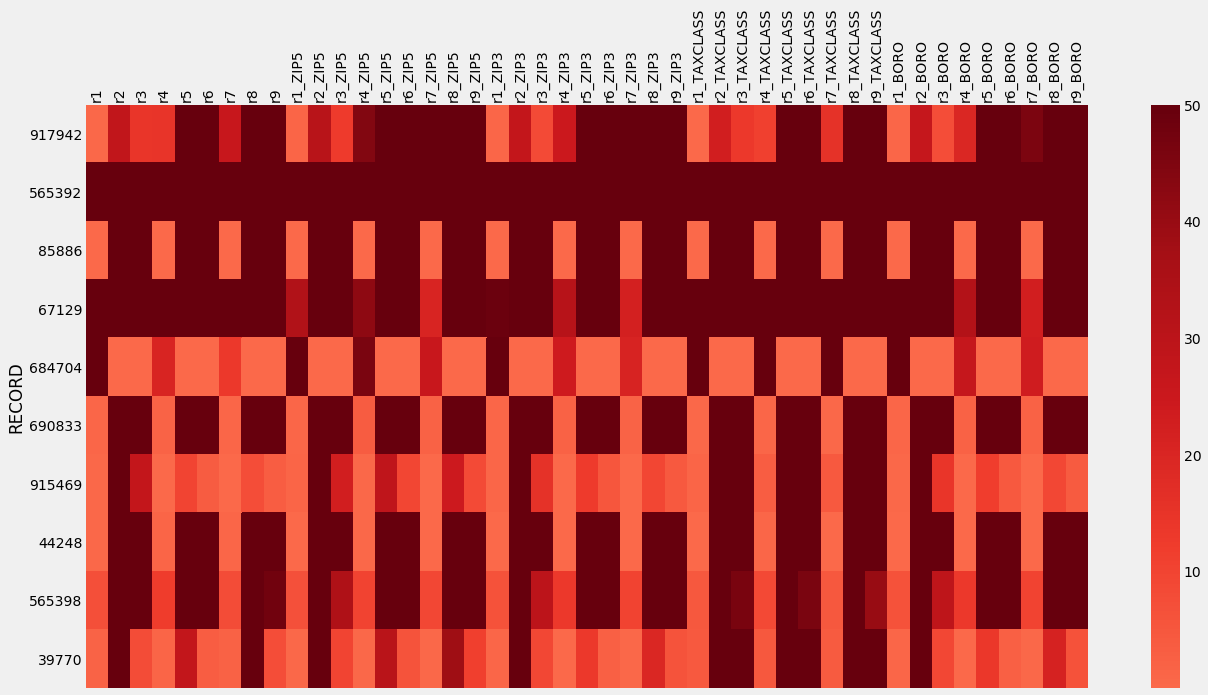

In [101]:

plt.rcParams['figure.figsize'] = (20,10)
sns.heatmap(plot_data.abs(), center = 0, cmap='Reds', vmax = 50).xaxis.tick_top()
plt.yticks(rotation = 360)
plt.xticks(rotation = 90)